# Display_crowdtangle_extension_data

Takes a directory of files downloaded from crowdtangle extension. Combines into one file, displays

In [1]:
import pandas as pd
import os
import glob
import datetime
import statistics
import matplotlib.pyplot as plt



def clean_ct_file(filename):
    print(filename)
    # How many columns *should* there be?
    rawdata = open(filename).read().split('\n')
    cols_per_row = [x.count(',')+1 for x in rawdata[4:]]
    numcols = int(statistics.median(cols_per_row))
    
    # remove top 4 rows, remove empty rows, force to median # columns
    linearray = []
    for (cols_in_row, line) in zip(cols_per_row, rawdata[4:]):
        newline = line.split(',')
        if cols_in_row > numcols:
            splitcol = cols_in_row - numcols + 1
            newline = [','.join(newline[:splitcol])] + newline[splitcol:]
            print('{}'.format(newline))
        if cols_in_row != 1:
            linearray += [newline]
    
    # Add in columns for file / country
    dffile = pd.DataFrame(linearray[1:], columns=linearray[0])
    dffile['url'] = rawdata[0].split(': ')[-1]
    try:
        dffile['country'] = filename.split('/')[-1].split('_')[0]
    except:
        dffile['country'] = ''
    
    return dffile


# Get big dataframe with all the things in
df = pd.DataFrame()
path = 'Crowdtangle_trawl_Covidsites'
filenames = glob.glob(path + '/*.csv')
for filename in filenames:
    dffile = clean_ct_file(filename)
    df = df.append(dffile)
df = df.astype({'Followers': int, 'Interactions': int})
df.to_csv('all_ct_covidsites.csv', index=False)

dfsummary = df.groupby(['Source', 'Post Type', 'country']).agg({'Followers':'max', 
                         'Interactions':'sum'}).reset_index().sort_values('Interactions', ascending=False)
dfsummary.to_csv('all_ct_covidsites_summary.csv', index=False)

# test code
filedatetime = datetime.datetime.fromtimestamp(os.stat(filenames[0]).st_ctime)
filedatetimepretty = filedatetime.strftime("%b %d %Y %H:%M:%S")

df

Crowdtangle_trawl_Covidsites/am_covidsite_ct_facebook.csv
['CORONAVIRUS: Armenia  Azerbaijan, Georgia, North Caucasus', '0', 'Fri Mar 27 2020 15:09:48 GMT+0000', '0', 'Facebook', 'https://www.facebook.com/groups/2589538074623223/permalink/2596718183905212']
Crowdtangle_trawl_Covidsites/az_covidsite_ct_facebook.csv
Crowdtangle_trawl_Covidsites/al_covidsite_ct_facebook.csv


,Source,Followers,Date,Interactions,Post Type,Link,url,country
0,Arsen Torosyan,139471,Sun Mar 15 2020 21:06:31 GMT+0000,4308,Facebook,https://www.facebook.com/336154206570851/posts...,https://ncdc.am/coronavirus/confirmed-cases-by...,am
1,Iravaban.net,182768,Fri Mar 27 2020 14:08:09 GMT+0000,1116,Facebook,https://www.facebook.com/233186100117816/posts...,https://ncdc.am/coronavirus/confirmed-cases-by...,am
2,ՀՀ առողջապահության նախարարություն,68193,Thu Mar 19 2020 14:53:35 GMT+0000,904,Facebook,https://www.facebook.com/1455050464736078/post...,https://ncdc.am/coronavirus/confirmed-cases-by...,am
3,ՀՀ առողջապահության նախարարություն,74882,Fri Mar 27 2020 14:00:39 GMT+0000,637,Facebook,https://www.facebook.com/1455050464736078/post...,https://ncdc.am/coronavirus/confirmed-cases-by...,am
4,ՀՀ առողջապահության նախարարություն,75504,Sat Mar 28 2020 18:04:05 GMT+0000,422,Facebook,https://www.facebook.com/1455050464736078/post...,https://ncdc.am/coronavirus/confirmed-cases-by...,am
...,...,...,...,...,...,...,...,...
495,Voz Ciudadana Chile,123092,Fri Jun 05 2020 03:38:28 GMT+0000,1,Facebook,https://www.facebook.com/582548155280592/posts...,https://coronavirus.al/,al
496,Youths Supports Mohammed Bin Salman,0,Wed Jan 13 2021 15:46:26 GMT+0000,1,Facebook,https://www.facebook.com/groups/26903542380699...,https://coronavirus.al/,al
497,EDI RAMA Kryeministeri ✌,9102,Sat Mar 28 2020 16:25:54 GMT+0000,1,Facebook,https://www.facebook.com/groups/20142029377776...,https://coronavirus.al/,al
498,ASHOK KUMAR ✅,84158,Sat Apr 17 2021 06:05:12 GMT+0000,0,Facebook,https://www.facebook.com/groups/53981859334109...,https://coronavirus.al/,al


In [2]:
df['Source'].value_counts().reset_index()

,index,Source
0,coronavirus.al,272
1,Koronavirus Informasiya Portalı,50
2,BIRLIK,13
3,İctimai Səhiyyə və İslahatlar Mərkəzi,12
4,Agjencia Telegrafike Shqiptare,9
...,...,...
286,Noticias Cusco,1
287,STV Haryana News,1
288,Albania for all,1
289,Noticias Mundo Maya Petén,1


In [3]:
dfsummary

,Source,Post Type,country,Followers,Interactions
247,coronavirus.al,Facebook,al,14819,39629
77,Edi Rama,Facebook,al,1238618,4407
26,Arsen Torosyan,Facebook,am,139471,4308
278,ՀՀ առողջապահության նախարարություն,Facebook,am,77803,2334
131,Koronavirus Informasiya Portalı,Facebook,az,0,1890
...,...,...,...,...,...
65,DISCUSS.group - объявления,Facebook,az,0,0
264,Լուրեր,Facebook,am,13441,0
265,Լուրեր / News / Новости,Facebook,am,7865,0
266,Լուրեր // News // Новости // Lurer,Facebook,am,35532,0


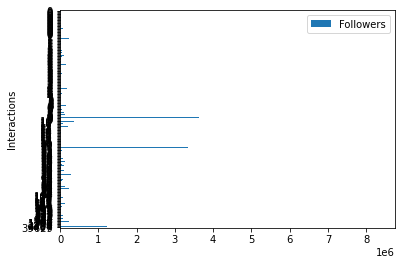

In [4]:
dfsummary.plot.barh(x='Interactions')

/Users/sara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127758 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends

/Users/sara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127758 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/sara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2360 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/sara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2381 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/sara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2357 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/sara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/sara/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_a

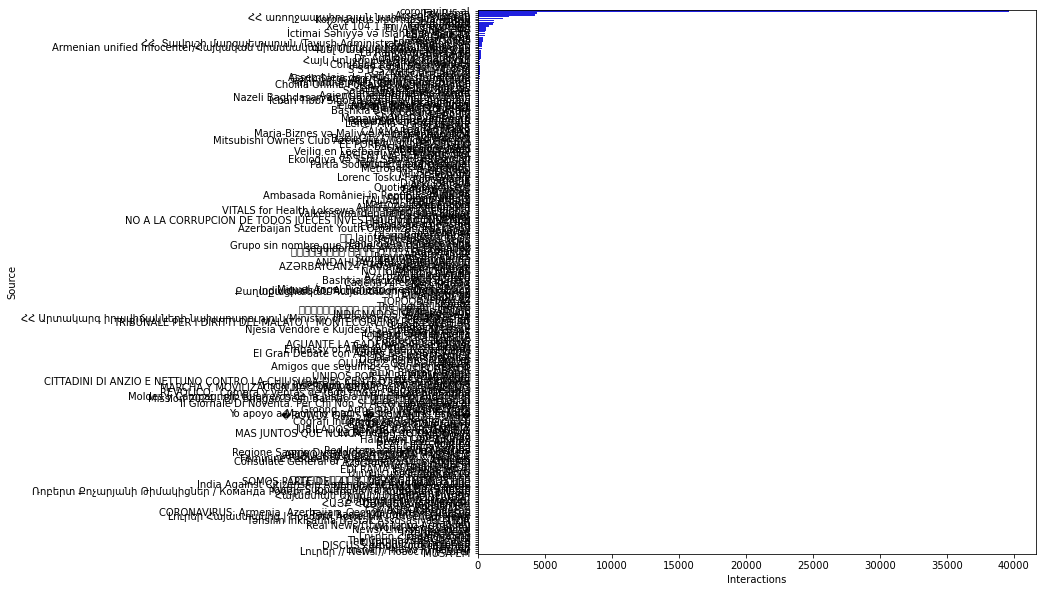

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x="Interactions", y="Source", data=dfsummary, label="Source", color="b")